In [1]:
import time
start = time.time()
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import glacierml as gl
from tqdm import tqdm
pd.set_option('display.max_column',None)

2024-03-14 10:53:21.238422: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-14 10:53:21.282236: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 10:53:21.884927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
E_delta_a, areas, cols, train = gl.load_LOO_data(include_train = True)
E_delta_a, areas, cols, df = gl.load_LOO_data(include_train = False)

R = ((train[cols]/1e3) - (train['Thickness']/1e3)) /( train['Thickness']/1e3)

var_H = np.mean(np.var(R,axis = 1)) * np.mean(df[cols]/1e3,axis = 1)**2

var_eps_H = np.var(df[cols]/1e3,axis = 1)

E_H = np.mean(df[cols]/1e3,axis = 1)
A = df['Area']

k = 3
p = 0.7
e1 = 0.039
sig_A = k*e1*(A**p)

In [3]:
g1 = (var_H * sig_A**2)
g2 = (E_H**2 * sig_A**2)
g3 = (A**2 * var_H)
g4 = (var_eps_H * sig_A**2)
g5 = (A**2 * var_eps_H)


f = (
    (var_H * sig_A**2) + (E_H**2 * sig_A**2) + (A**2 * var_H) + 
    (var_eps_H * sig_A**2) + (A**2 * var_eps_H)
)

In [4]:
df = pd.concat([df,pd.Series(f,name = 'sig_sq')],axis = 1)

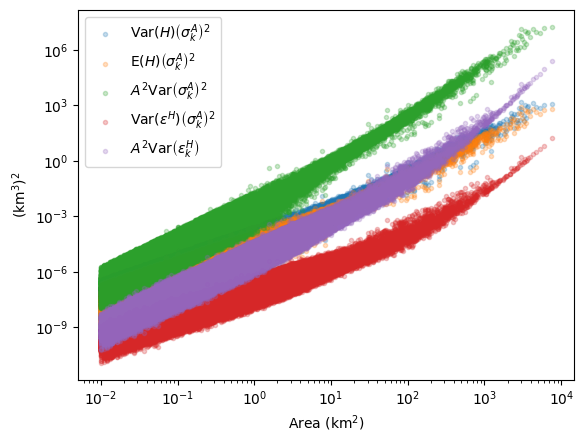

In [5]:
plt.scatter(df['Area'],g1,alpha = 0.25,
            label = r'Var$\left(H\right)\left(\sigma^A_k\right)^2$',
            marker = '.'
           )
plt.scatter(
    df['Area'],g2,alpha = 0.25,label = r'E$\left(H\right)\left(\sigma^A_k\right)^2$',
    marker = '.'
)
plt.scatter(
    df['Area'],g3,alpha = 0.25,
    label = r'$A^2$Var$\left(\sigma^A_k\right)^2$',
    marker = '.'
)
plt.scatter(
    df['Area'],g4,alpha = 0.25,
    label = r'Var$\left(\epsilon^H\right)\left(\sigma^A_k\right)^2$',
    marker = '.'
)
plt.scatter(
    df['Area'],g5,alpha = 0.25,
    label = r'$A^2$Var$\left(\epsilon^H_k\right)$',
    marker = '.'
)
plt.xlabel('Area (km$^2$)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('(km$^3$)$^2$')
plt.legend()

In [6]:
h = np.mean(df[cols] / 1e3,axis = 1)
A = df['Area']

si = df['sig_sq']

se = np.sqrt(len(df)*np.sum(si))

c = (1.96)
Vlb = np.round( np.sum(h * A) - (c * se) , 0) / 1e3
Vub = np.round( np.sum(h * A) + (c * se) , 0) / 1e3

print(f'[{Vlb},{Vub}]  * 10^3 km^3')

print(f'Mid CI: {np.round((Vub + Vlb) / 2,3)} * 10^3 km^3')

print(f'CI Half Width: {np.round((Vub - Vlb) / 2,3)} * 10^3 km^3')

[-12147.986,12419.299]  * 10^3 km^3
Mid CI: 135.657 * 10^3 km^3
CI Half Width: 12283.643 * 10^3 km^3
